## Library installations
install.packages("ggplot2")

install.packages("splm") 

install.packages("foreign")

install.packages("readstata13")

install.packages("lubridate")

install.packages("plm")

install.packages("taRifx")

install.packages("zoo")

install.packages("rgdal")

install.packages("tidyverse")

In [1]:
.libPaths()

[1] "C:/Program Files/R/R-3.5.1/library"

In [2]:
library(ggplot2)
library(splm)
library(foreign)
library(readstata13)
library(lubridate)
library(plm)
library(taRifx)
library(zoo)
library(rgdal)
#library(tidyverse)

Loading required package: spdep
Loading required package: sp
Loading required package: Matrix
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: Formula

Attaching package: 'taRifx'

The following object is masked from 'package:plm':

    between


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

rgdal: version: 1.3-6, (SVN revision 773)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Program Files/R/R-3.5.1/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 

In [3]:
# input Stata file
mydata.df <- read.dta13("D:\\Box Sync\\Policy Evaluation\\working_data\\analytical_file_panel_qt.dta")

In [4]:
summary(mydata.df)

 intersection_id    quarter          year        quarterly       index      
 Min.   :    1   Min.   :1.00   Min.   :2012   Min.   :210   Min.   :    0  
 1st Qu.: 3385   1st Qu.:2.00   1st Qu.:2014   1st Qu.:216   1st Qu.: 3383  
 Median : 6669   Median :3.00   Median :2015   Median :222   Median : 6667  
 Mean   : 6654   Mean   :2.52   Mean   :2015   Mean   :222   Mean   : 6653  
 3rd Qu.: 9944   3rd Qu.:3.00   3rd Qu.:2017   3rd Qu.:228   3rd Qu.: 9942  
 Max.   :13214   Max.   :4.00   Max.   :2018   Max.   :234   Max.   :13212  
                                                                            
       y                x             st1_name           st2_name        
 Min.   :122549   Min.   : 914216   Length:324675      Length:324675     
 1st Qu.:178942   1st Qu.: 990095   Class :character   Class :character  
 Median :199159   Median :1001439   Mode  :character   Mode  :character  
 Mean   :200888   Mean   :1003739                                        
 3rd Qu.:21983

In [5]:
# Input shapefile
myshp  <-readOGR(dsn="D:\\Box Sync\\Policy Evaluation\\working_data\\analytical_panel_shapefile\\analytical_panel_qt_shapefile_crosssec_thiessen_polygons.shp",layer="analytical_panel_qt_shapefile_crosssec_thiessen_polygons")

OGR data source with driver: ESRI Shapefile 
Source: "D:\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_crosssec_thiessen_polygons.shp", layer: "analytical_panel_qt_shapefile_crosssec_thiessen_polygons"
with 12987 features
It has 30 fields


In [6]:
summary(myshp)

Object of class SpatialPolygonsDataFrame
Coordinates:
       min       max
x 911158.3 1070171.2
y 119490.9  274784.9
Is projected: TRUE 
proj4string :
[+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666
+lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 +y_0=0
+datum=NAD83 +units=us-ft +no_defs +ellps=GRS80 +towgs84=0,0,0]
Data attributes:
   collision_       personsinj        pedestrian      cyclistinj     
 Min.   : 0.000   Min.   : 0.0000   Min.   :0.000   Min.   :0.00000  
 1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.:0.000   1st Qu.:0.00000  
 Median : 1.000   Median : 0.0000   Median :0.000   Median :0.00000  
 Mean   : 1.845   Mean   : 0.5269   Mean   :0.124   Mean   :0.06406  
 3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.:0.000   3rd Qu.:0.00000  
 Max.   :55.000   Max.   :19.0000   Max.   :4.000   Max.   :3.00000  
   motoristin          bronx           brooklyn        manhattan     
 Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 0

In [7]:
names(myshp) <- c("collision_count","personsinjured","pedestriansinjured","cyclistinjured","motoristinjured","bronx","brooklyn","manhattan","queens","statenisland","distance_to_LPIS","distance_to_Street","distance_to_Sch","distance_to_LTC","distance_to_bikeroute","distance_to_truckroute","flag_left_turn_ever","flag_left_turn","flag_LPIS_ever","flag_LPIS","bike_route_tv","bike_route_ever", "flag_seniors","flag_priorityinters","flag_school","quarter","year","intersection_id","y","x")

In [8]:
summary(myshp)

Object of class SpatialPolygonsDataFrame
Coordinates:
       min       max
x 911158.3 1070171.2
y 119490.9  274784.9
Is projected: TRUE 
proj4string :
[+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666
+lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 +y_0=0
+datum=NAD83 +units=us-ft +no_defs +ellps=GRS80 +towgs84=0,0,0]
Data attributes:
 collision_count  personsinjured    pedestriansinjured cyclistinjured   
 Min.   : 0.000   Min.   : 0.0000   Min.   :0.000      Min.   :0.00000  
 1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.:0.000      1st Qu.:0.00000  
 Median : 1.000   Median : 0.0000   Median :0.000      Median :0.00000  
 Mean   : 1.845   Mean   : 0.5269   Mean   :0.124      Mean   :0.06406  
 3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.:0.000      3rd Qu.:0.00000  
 Max.   :55.000   Max.   :19.0000   Max.   :4.000      Max.   :3.00000  
 motoristinjured       bronx           brooklyn        manhattan     
 Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000   Min.   

In [10]:
# Create time variable in mydata
mydata.df$x <- paste(as.character(mydata.df$year) , as.character(mydata.df$quarter))
mydata.df$quarter_year <- as.yearqtr(format(mydata.df$x), "%Y%q")

In [11]:
w = table(mydata.df$quarter_year)
w


2012 Q3 2012 Q4 2013 Q1 2013 Q2 2013 Q3 2013 Q4 2014 Q1 2014 Q2 2014 Q3 2014 Q4 
  12987   12987   12987   12987   12987   12987   12987   12987   12987   12987 
2015 Q1 2015 Q2 2015 Q3 2015 Q4 2016 Q1 2016 Q2 2016 Q3 2016 Q4 2017 Q1 2017 Q2 
  12987   12987   12987   12987   12987   12987   12987   12987   12987   12987 
2017 Q3 2017 Q4 2018 Q1 2018 Q2 2018 Q3 
  12987   12987   12987   12987   12987 

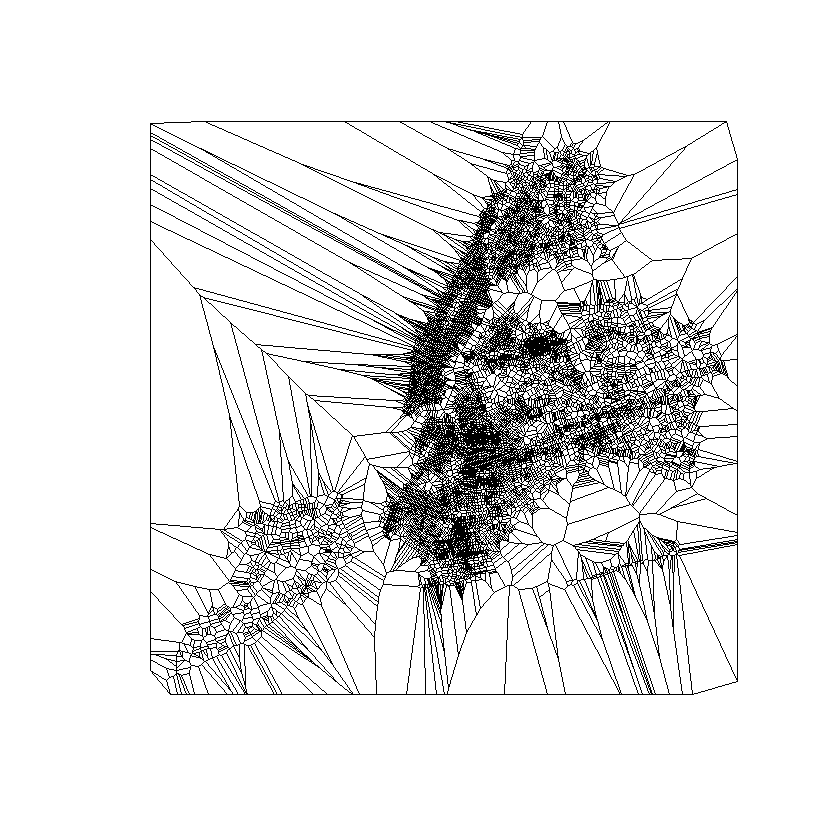

In [12]:
plot(myshp)

In [14]:
## Linear regression 
ols <- lm(collision_count~flag_LPIS,data=mydata.df)
summary(ols)


Call:
lm(formula = collision_count ~ flag_LPIS, data = mydata.df)

Residuals:
   Min     1Q Median     3Q    Max 
-2.033 -1.645 -0.645  0.355 75.355 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.644956   0.004529  363.19   <2e-16 ***
flag_LPIS   0.388354   0.018418   21.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.501 on 324673 degrees of freedom
Multiple R-squared:  0.001368,	Adjusted R-squared:  0.001364 
F-statistic: 444.6 on 1 and 324673 DF,  p-value: < 2.2e-16


In [15]:
## Linear regression 
ols_time <- lm(collision_count~flag_LPIS+factor(quarter_year),data=mydata.df)
summary(ols_time)


Call:
lm(formula = collision_count ~ flag_LPIS + factor(quarter_year), 
    data = mydata.df)

Residuals:
   Min     1Q Median     3Q    Max 
-2.588 -1.605 -0.841  0.663 75.036 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.844768   0.021822  84.536  < 2e-16 ***
flag_LPIS                    0.623887   0.019119  32.632  < 2e-16 ***
factor(quarter_year)2012 Q4 -0.023485   0.030861  -0.761 0.446666    
factor(quarter_year)2013 Q1 -0.161979   0.030861  -5.249 1.53e-07 ***
factor(quarter_year)2013 Q2  0.086616   0.030861   2.807 0.005007 ** 
factor(quarter_year)2013 Q3 -0.001587   0.030861  -0.051 0.958979    
factor(quarter_year)2013 Q4  0.045191   0.030861   1.464 0.143111    
factor(quarter_year)2014 Q1 -0.142853   0.030861  -4.629 3.68e-06 ***
factor(quarter_year)2014 Q2  0.032130   0.030861   1.041 0.297824    
factor(quarter_year)2014 Q3 -0.004078   0.030861  -0.132 0.894885    
factor(quarter_year)2014 Q4  0.01597

In [16]:
# Linear panel regression
fe <- plm(collision_count ~ flag_LPIS,
            data = mydata.df, index = c("intersection_id","quarter_year"), model = "within")
summary(fe)

Oneway (individual) effect Within Model

Call:
plm(formula = collision_count ~ flag_LPIS, data = mydata.df, 
    model = "within", index = c("intersection_id", "quarter_year"))

Balanced Panel: n = 12987, T = 25, N = 324675

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-17.360  -0.760  -0.040   0.520  61.538 

Coefficients:
           Estimate Std. Error t-value  Pr(>|t|)    
flag_LPIS -0.505051   0.014092 -35.839 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    741810
Residual Sum of Squares: 738770
R-Squared:      0.0041039
Adj. R-Squared: -0.037392
F-statistic: 1284.4 on 1 and 311687 DF, p-value: < 2.22e-16

In [18]:
pFtest(fe, ols) 


	F test for individual effects

data:  collision_count ~ flag_LPIS
F = 42.002, df1 = 12986, df2 = 311690, p-value < 2.2e-16
alternative hypothesis: significant effects


In [19]:
# Linear panel regression
re <- plm(collision_count ~ flag_LPIS,
            data = mydata.df, index = c("intersection_id","quarter_year"), model = "random")
summary(re)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = collision_count ~ flag_LPIS, data = mydata.df, 
    model = "random", index = c("intersection_id", "quarter_year"))

Balanced Panel: n = 12987, T = 25, N = 324675

Effects:
                var std.dev share
idiosyncratic 2.370   1.540 0.384
individual    3.805   1.951 0.616
theta: 0.8441

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-13.98210  -0.80481  -0.26461   0.49905  63.69459 

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  1.696979   0.017360  97.754 < 2.2e-16 ***
flag_LPIS   -0.471916   0.014009 -33.687 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    773240
Residual Sum of Squares: 770550
R-Squared:      0.0034831
Adj. R-Squared: 0.00348
F-statistic: 1134.81 on 1 and 324673 DF, p-value: < 2.22e-16

In [20]:
# Hausman test
phtest(fe, re)


	Hausman Test

data:  collision_count ~ flag_LPIS
chisq = 468.04, df = 1, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


Hausman test is significant. Use fixed effects.

In [21]:
# Calculate contiguity queen neighbors
myshp_nb <- poly2nb(myshp, queen = TRUE)

In [22]:
summary(myshp_nb)

Neighbour list object:
Number of regions: 12987 
Number of nonzero links: 77720 
Percentage nonzero weights: 0.04608028 
Average number of links: 5.984446 
Link number distribution:

   2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17 
   3   66 1470 3544 4144 2278  825  359  160   69   30   15   12    7    2    1 
  19   20 
   1    1 
3 least connected regions:
2769 10139 12801 with 2 links
1 most connected region:
5579 with 20 links


In [27]:
 myshp_nb_w <- nb2listw(myshp_nb,glist=NULL,style="W",zero.policy=FALSE) 

In [31]:
fm <- collision_count~flag_LPIS
sararremod <- spml(formula  = fm, data=mydata.df, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, model = "random", lag = FALSE, spatial.error = "kkp")
summary(sararremod)

ML panel with , spatial RE (KKP), spatial error correlation 

Call:
spreml(formula = formula, data = data, index = index, w = listw2mat(listw), 
    w2 = listw2mat(listw2), lag = lag, errors = errors, cl = cl)

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.702  -1.702  -0.702  -0.011   0.298  75.298 

Error variance parameters:
    Estimate Std. Error t-value  Pr(>|t|)    
phi 1.525500   0.019911  76.617 < 2.2e-16 ***
rho 0.221179   0.002677  82.622 < 2.2e-16 ***

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  1.701815   0.021445  79.359 < 2.2e-16 ***
flag_LPIS   -0.369896   0.014703 -25.159 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [37]:
fm <- collision_count~flag_LPIS
sararfemod <- spml(formula  = fm, data=mydata.df, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, model = "within", effect = "individual",lag = TRUE,spatial.error = "b",method = "eigen",quiet = FALSE, tol.solve = 1e-10,legacy = FALSE)
summary(sararfemod)


 Spatial SARAR Fixed Effects Model

Spatial fixed effects model
 Jacobian calculated using neighbourhood matrix eigenvalues
Computing eigenvalues ...

neighbourhood matrix eigenvalues
Computing eigenvalues ...

lambda: -1.38167  rho: 0.8  function: -1273046  Jacobian1: -2009.071  Jacobian2: -1004.83  SSE: 1216703 
lambda: -1.38167  rho: 0.8  function: -1273046  Jacobian1: -2009.071  Jacobian2: -1004.83  SSE: 1216703 
lambda: -1.38167  rho: 0.8  function: -1273046  Jacobian1: -2009.071  Jacobian2: -1004.83  SSE: 1216703 
lambda: -0.4890858  rho: 1  function: -1283807  Jacobian1: -240.4936  Jacobian2: -2308.29  SSE: 1396633 
lambda: -1.079805  rho: 1  function: -1269592  Jacobian1: -1176.865  Jacobian2: -2308.29  SSE: 1107710 
lambda: -1.080867  rho: 1  function: -1269594  Jacobian1: -1179.291  Jacobian2: -2308.29  SSE: 1107312 
lambda: -1.079805  rho: 0.9989381  function: -1268286  Jacobian1: -1176.865  Jacobian2: -2254.109  SSE: 1108045 
lambda: -1.079486  rho: 0.8189459  function: -1

ERROR: Error: cannot allocate vector of size 31.4 Gb


In [38]:
GM_error <- spgm(formula = fm, data = mydata.df, index = c("intersection_id","quarter_year"), lag = TRUE, listw = myshp_nb_w, model = "within", spatial.error = TRUE)
summary(GM_error)


ERROR: Error: cannot allocate vector of size 785.4 Gb


In [42]:
# alternative hypothesis is one of no random regional effects
test1 <- bsktest(x = fm, data = mydata.df,index = c("intersection_id","quarter_year"), listw = myshp_nb_w, test = "LM1")
print(test1)



	Baltagi, Song and Koh SLM1 marginal test

data:  collision_count ~ flag_LPIS
LM1 = 68.375, p-value < 2.2e-16
alternative hypothesis: Random effects



In [43]:
# The alternative hypothesis is one of no random regional effects
test2 <- bsktest(x = fm, data = mydata.df,index = c("intersection_id","quarter_year"), listw = myshp_nb_w,test = "LM2")
test2


	Baltagi, Song and Koh LM2 marginal test

data:  collision_count ~ flag_LPIS
LM2 = 188.3, p-value < 2.2e-16
alternative hypothesis: Spatial autocorrelation


In [46]:
#check for spatial correlation in the errors of a model that possibly incorporates random effects
bsktest(x = fm, data = mydata.df,index = c("intersection_id","quarter_year"), listw =myshp_nb_w, test = "CLMlambda")


	Baltagi, Song and Koh LM*-lambda conditional LM test (assuming
	sigma^2_mu >= 0)

data:  collision_count ~ flag_LPIS
LM*-lambda = 79.434, p-value < 2.2e-16
alternative hypothesis: Spatial autocorrelation


In [48]:
# spatial hausman 
spatialhausman <- sphtest(x = fm, data = mydata.df,index = c("intersection_id","quarter_year"), listw = myshp_nb_w, spatial.model = "error", method = "GM")
spatialhausman


ERROR: Error: cannot allocate vector of size 785.4 Gb


In [49]:
mod1 <- spgm(formula = fm, data = mydata.df, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, lag = TRUE, moments = "fullweights", model = "random", spatial.error = TRUE)
mod2 <- spgm(formula = fm, data = mydata.df, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, lag = TRUE, model = "within", spatial.error = TRUE)
test2 <- sphtest(x = mod1, x2 = mod2)
test2

ERROR: Error: cannot allocate vector of size 785.4 Gb
